In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
# Simulates a single roll with a given set of outcomes and probabilities
def simulateRoll(outcomes, probabilities, samples=1):
    result = random.choices(outcomes, weights=probabilities, k=samples)
    
    return result[0] if samples == 1 else result

# Adds the result of each roll to an array and returns the array
def simulateGame(numRolls, outcomes, probabilities):
    results = simulateRoll(outcomes, probabilities, numRolls)
    return results

# Plot the averages as the game progresses
def plotAverages(results):
    averages = []
    for i in range(len(results)):
        averages.append(np.mean(results[:i+1]))
    plt.plot(averages)
    plt.show()

# Machine 1
**Probability of getting $10:** 40%

**Probability of getting $0:** 60%

Average:  3.99


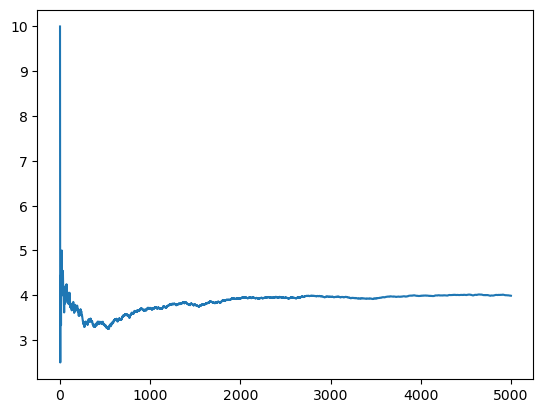

In [4]:
# Run the simulation and plot the averages
games = 5000
outcomes = [10, 0]
probabilities = [0.4, 0.6]

results = simulateGame(games, outcomes, probabilities)
print("Average: ", np.mean(results))

plotAverages(results)

# Machine 2
**Probability of getting $100:** 3%

**Probability of getting $0:** 93%

Average:  3.08


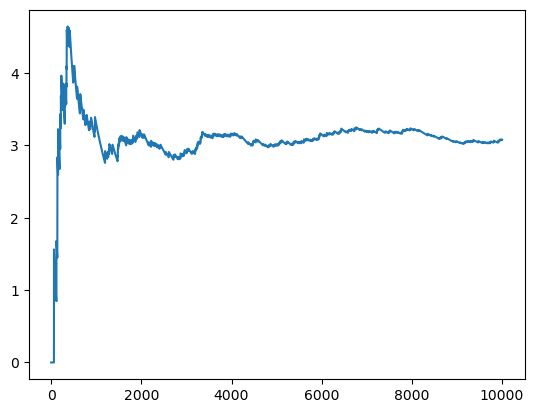

In [5]:
# Run the simulation and plot the averages
games = 10000
outcomes = [100, 0]
probabilities = [0.03, 0.97]

results = simulateGame(games, outcomes, probabilities)
print("Average: ", np.mean(results))

plotAverages(results)

## Calculating the expected value as we go

We want to update our expected value as we start getting results, not after a lot of tries

Since we don't know where where it should converge, we should notice when it stops "oscilating". We could look at the parts where the previous delta moves "a little".

In [6]:
# Calculate the expected value of the game
def calculateExpectedValue(currentIteration, previousExpectedValue, learningRate=0):
    if learningRate == 0:
        learningRate = 1/currentIteration

    expectedValue = previousExpectedValue + learningRate*(simulateRoll(outcomes, probabilities) - previousExpectedValue)

    return expectedValue

# Simulate the game and calculate the expected value
def simulateGameWithExpectedValue(outcomes, probabilities, learningRate=0):
    expectedValue = simulateRoll(outcomes, probabilities) # Our first expected value

    currentIteration = 1
    error = 1 # Just to enter the while loop
    initialIterations = 500 # This prevents the initial convergence from stopping from consecutive values
    expectedValueArray = []

    if learningRate == 0:
        for i in range(initialIterations):
            expectedValue = calculateExpectedValue(currentIteration, expectedValue)
            expectedValueArray.append(expectedValue)
            currentIteration += 1

        while abs(error) >= 0.001:
            currentIteration += 1
            previousExpectedValue = expectedValue
            expectedValue = calculateExpectedValue(currentIteration, expectedValue)
            expectedValueArray.append(expectedValue)
            error = abs(expectedValue - previousExpectedValue)

        print("\nConvergence iteration: ", currentIteration)
        print("Error: ", error)
        label = "Moving LR"
    
    else:
        for i in range(initialIterations):
            expectedValue = calculateExpectedValue(learningRate, expectedValue, learningRate)
            expectedValueArray.append(expectedValue)
            currentIteration += 1

        while currentIteration < 1000000 and error >= 0.001:
            currentIteration += 1
            previousExpectedValue = expectedValue
            expectedValue = calculateExpectedValue(learningRate, expectedValue, learningRate)
            expectedValueArray.append(expectedValue)
            error = abs(expectedValue - previousExpectedValue)

        print("\nConvergence iteration with learning rate ", learningRate, ": ", currentIteration)
        print("Error: ", error)
        print("Expected Value with learning rate ", learningRate, ": ", expectedValue)
        label = str(learningRate)

    expectedValueDict = {"Expected Value": expectedValue, "Expected Value Array": expectedValueArray, "Label": label}
    return expectedValueDict


# Machine 1
**Probability of getting $10:** 40%

**Probability of getting $0:** 60%


Convergence iteration:  3980
Error:  0.0009998560280668478
Expected Value:  3.978427135678388

Convergence iteration with learning rate  0.1 :  1000000
Error:  0.5578057189239223
Expected Value with learning rate  0.1 :  5.020251470315305

Convergence iteration with learning rate  0.01 :  1000000
Error:  0.03839260536906597
Expected Value with learning rate  0.01 :  3.800867931537549

Convergence iteration with learning rate  0.001 :  1000000
Error:  0.003904197780454144
Expected Value with learning rate  0.001 :  3.9002935826737755

Convergence iteration with learning rate  0.002 :  1000000
Error:  0.011973126655943744
Expected Value with learning rate  0.002 :  4.025409798684031

Convergence iteration with learning rate  0.005 :  1000000
Error:  0.019581066333313135
Expected Value with learning rate  0.005 :  3.896632200329272

Convergence iteration with learning rate  0.007 :  1000000
Error:  0.040495944877749324
Expected Value with learning rate  0.007 :  4.2553609623421815

Conve

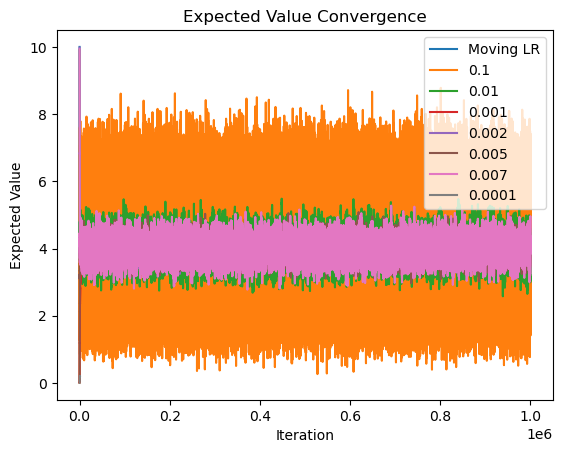

In [19]:
# Run the simulation and print the expected value
outcomes = [10, 0]
probabilities = [0.4, 0.6]
expectedValueArrays = []
labels = []

expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities)
expectedValueArrays.append(expectedValueDict["Expected Value Array"])
labels.append(expectedValueDict["Label"])
print("Expected Value: ", expectedValueDict["Expected Value"])

# Run the simulation with a fixed learning rate of 0.1, 0.01 and 0.001
for learningRate in [0.1, 0.01, 0.001, 0.002, 0.005, 0.007, 0.0001]:
    expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities, learningRate)
    expectedValueArrays.append(expectedValueDict["Expected Value Array"])
    labels.append(expectedValueDict["Label"])

# Plot the expected values
plt.xlabel("Iteration")
plt.ylabel("Expected Value")
plt.title("Expected Value Convergence")
for i in range(len(expectedValueArrays)):
    plt.plot(expectedValueArrays[i], label=labels[i])
plt.legend()
plt.show()

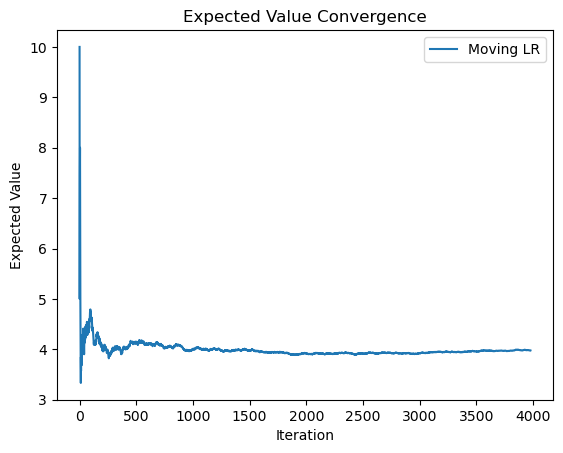

In [22]:
# Individual plots
plt.xlabel("Iteration")
plt.ylabel("Expected Value")
plt.title("Expected Value Convergence")
i = 0 # Change this to see individual plots
plt.plot(expectedValueArrays[i], label=labels[i])
plt.legend()
plt.show()

# Machine 2
**Probability of getting $100:** 3%

**Probability of getting $0:** 93%


Convergence iteration:  2917
Error:  0.0009996976242105937
Expected Value:  2.915118272197463

Convergence iteration with learning rate  0.1 :  679
Error:  0.000989018508692185
Expected Value with learning rate  0.1 :  0.008901166578229657

Convergence iteration with learning rate  0.01 :  763771
Error:  0.000992709031409772
Expected Value with learning rate  0.01 :  0.09827819410956727

Convergence iteration with learning rate  0.001 :  1000000
Error:  0.003526661963111355
Expected Value with learning rate  0.001 :  3.5231353011481494

Convergence iteration with learning rate  0.002 :  1000000
Error:  0.006312488746738509
Expected Value with learning rate  0.002 :  3.1499318846225246

Convergence iteration with learning rate  0.005 :  1000000
Error:  0.013561401013131302
Expected Value with learning rate  0.005 :  2.698718801613173

Convergence iteration with learning rate  0.007 :  1000000
Error:  0.028569840600364493
Expected Value with learning rate  0.007 :  4.052835959451686

Co

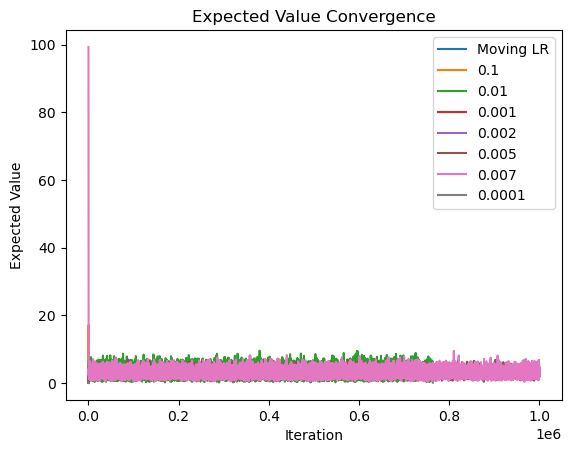

In [9]:
# Run the simulation and print the expected value
outcomes = [100, 0]
probabilities = [0.03, 0.97]
expectedValueArrays = []
labels = []

expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities)
expectedValueArrays.append(expectedValueDict["Expected Value Array"])
labels.append(expectedValueDict["Label"])
print("Expected Value: ", expectedValueDict["Expected Value"])

# Run the simulation with a fixed learning rate of 0.1, 0.01 and 0.001
for learningRate in [0.1, 0.01, 0.001, 0.002, 0.005, 0.007, 0.0001]:
    expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities, learningRate)
    expectedValueArrays.append(expectedValueDict["Expected Value Array"])
    labels.append(expectedValueDict["Label"])

# Plot the expected values
plt.xlabel("Iteration")
plt.ylabel("Expected Value")
plt.title("Expected Value Convergence")
for i in range(len(expectedValueArrays)):
    plt.plot(expectedValueArrays[i], label=labels[i])
plt.legend()
plt.show()